Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day-1)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM532868', 'quandl', start=start, end=end )['Close'])   #DLF

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM533150', 'quandl', start=start, end=end )['Close'])   #Godrej_Prop

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM533273', 'quandl', start=start, end=end )['Close'])   #Oberoi_Realty

In [7]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM533274', 'quandl', start=start, end=end )['Close'])    #Prestige_Estate

In [9]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM533033', 'quandl', start=start, end=end )['Close'])    #ISGEC_Heavy_Eng

Renaming the close columns

In [8]:
DLF = com_df1.rename(columns={'Close':'DLF'})
Godrej_Prop = com_df2.rename(columns={'Close':'Godrej_Prop'})
Oberoi_Realty = com_df3.rename(columns={'Close':'Oberoi_Realty'})
Prestige_Estate = com_df4.rename(columns={'Close':'Prestige_Estate'})
ISGEC_Heavy_Eng = com_df5.rename(columns={'Close':'ISGEC_Heavy_Eng'})

Joinig all the data frames

In [9]:
close_df = (((DLF.join(Godrej_Prop, how="outer")).join(Oberoi_Realty, how="outer")).join(Prestige_Estate, how="outer")).join(ISGEC_Heavy_Eng,how="outer")

In [10]:
close_df

,DLF,Godrej_Prop,Oberoi_Realty,Prestige_Estate,ISGEC_Heavy_Eng
Date,,,,,
2018-08-13,194.50,690.15,483.35,250.40,6177.60
2018-08-10,196.60,693.80,481.95,249.95,6159.45
2018-08-09,200.65,712.45,476.05,250.60,6016.60
2018-08-08,189.00,718.50,479.55,250.70,6005.50
2018-08-07,186.75,711.80,475.85,252.35,5800.10
2018-08-06,189.25,711.35,481.60,254.20,5760.90
2018-08-03,188.90,733.40,482.85,255.90,5742.55
2018-08-02,188.05,724.55,481.05,256.60,5787.15
2018-08-01,193.05,743.10,488.45,260.00,5673.80


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,DLF,Godrej_Prop,Oberoi_Realty,Prestige_Estate,ISGEC_Heavy_Eng
Date,,,,,
2018-08-13,NaN,NaN,NaN,NaN,NaN
2018-08-10,0.010797,0.005289,-0.002896,-0.001797,-0.002938
2018-08-09,0.020600,0.026881,-0.012242,0.002601,-0.023192
2018-08-08,-0.058061,0.008492,0.007352,0.000399,-0.001845
2018-08-07,-0.011905,-0.009325,-0.007716,0.006582,-0.034202


# Pair Plotting

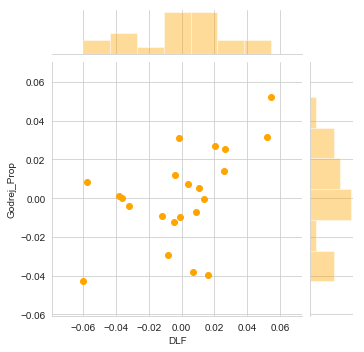

In [13]:
sns.jointplot('DLF','Godrej_Prop',rets, kind='scatter',height=5, color='orange')

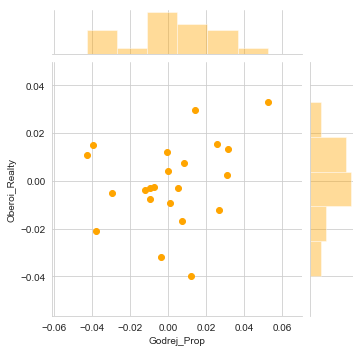

In [14]:
sns.jointplot('Godrej_Prop','Oberoi_Realty',rets, kind='scatter',height=5, color='orange')

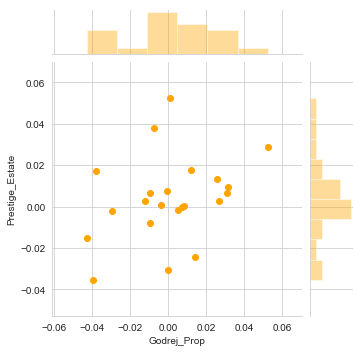

In [15]:
sns.jointplot('Godrej_Prop','Prestige_Estate',rets, kind='scatter',height=5, color='orange')

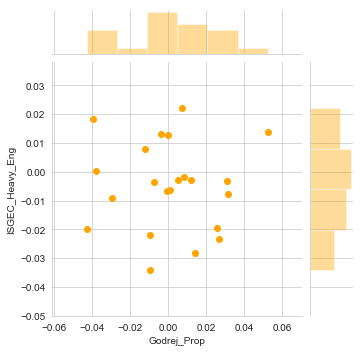

In [16]:
sns.jointplot('Godrej_Prop','ISGEC_Heavy_Eng',rets, kind='scatter',height=5, color='orange')

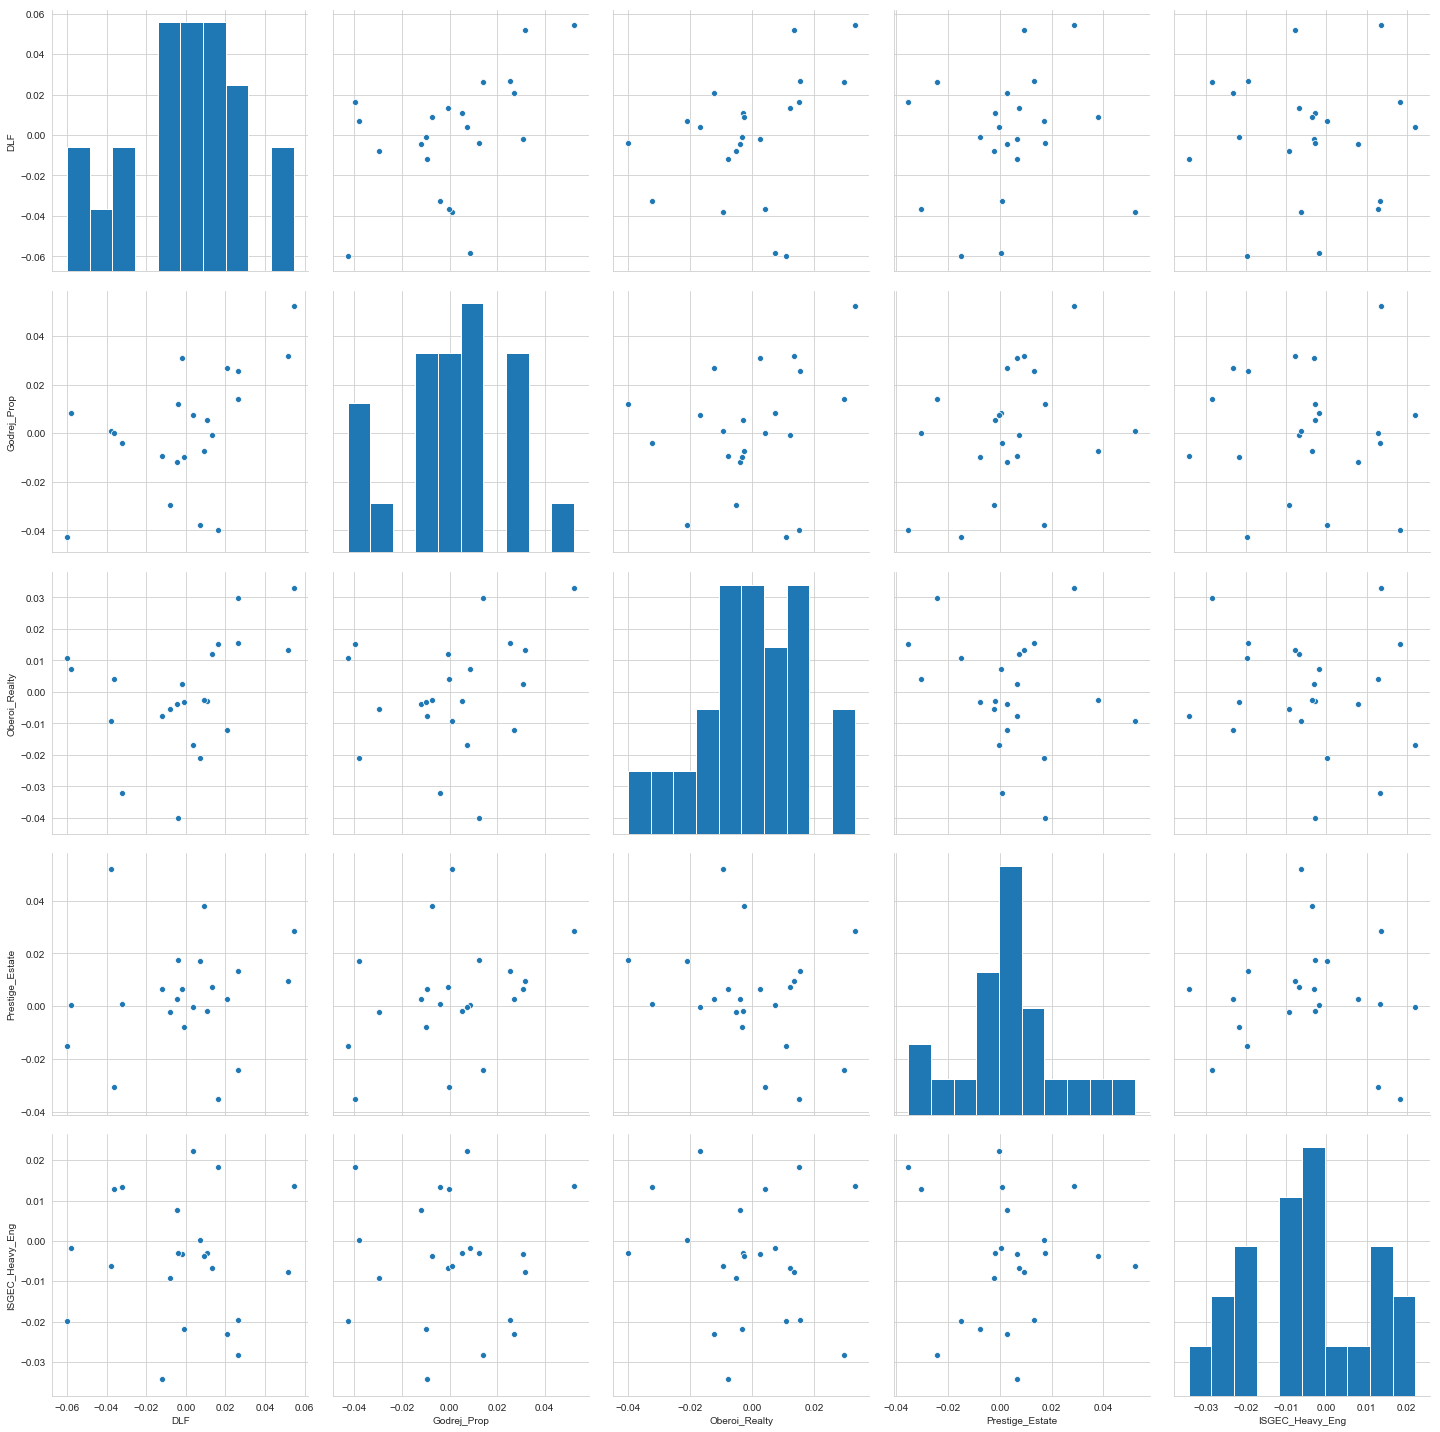

In [17]:
sns.pairplot(rets.dropna(),height=4)
#pt.savefig("PairPlotting")

# Correlation Matrix

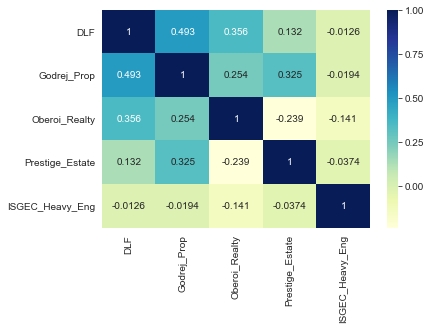

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

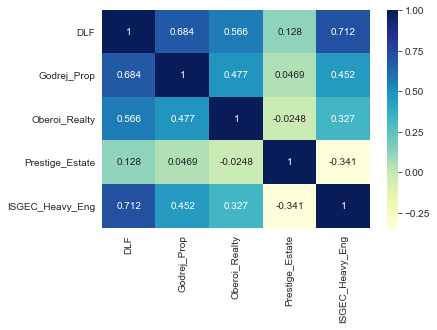

In [19]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

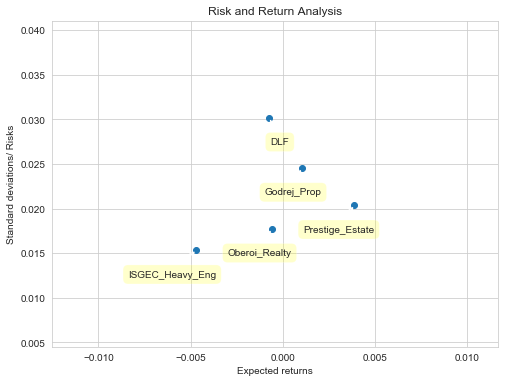

In [20]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))




<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [21]:
import numpy as np
import statsmodels.api as sm
X=close_df[['DLF','Oberoi_Realty','Prestige_Estate','ISGEC_Heavy_Eng']]
X = sm.add_constant(X)
y=close_df['Godrej_Prop']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Godrej_Prop   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     4.251
Date:                Mon, 13 Aug 2018   Prob (F-statistic):             0.0135
Time:                        22:57:57   Log-Likelihood:                -97.247
No. Observations:                  23   AIC:                             204.5
Df Residuals:                      18   BIC:                             210.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             356.0754    366.839      0.971      0.345    -414.625    1126.776
DLF                 2.0678      0.978      2.115      0.049       0.013       4.122
Oberoi_Realty       0.2576      0.529      0.487      0.632      -0.853       1.368
Prestige_Estate    -0.3189      0.799     -0.399      0.694      -1.997       1.359
ISGEC_Heavy_Eng    -0.0151      0.036     -0.422      0.678      -0.090       0.060
==============================================================================
Omnibus:                        2.171   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.291
Skew:                           0.275   Prob(JB):                        0.524
Kurtosis:                       1.978   Cond. No.                     5.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

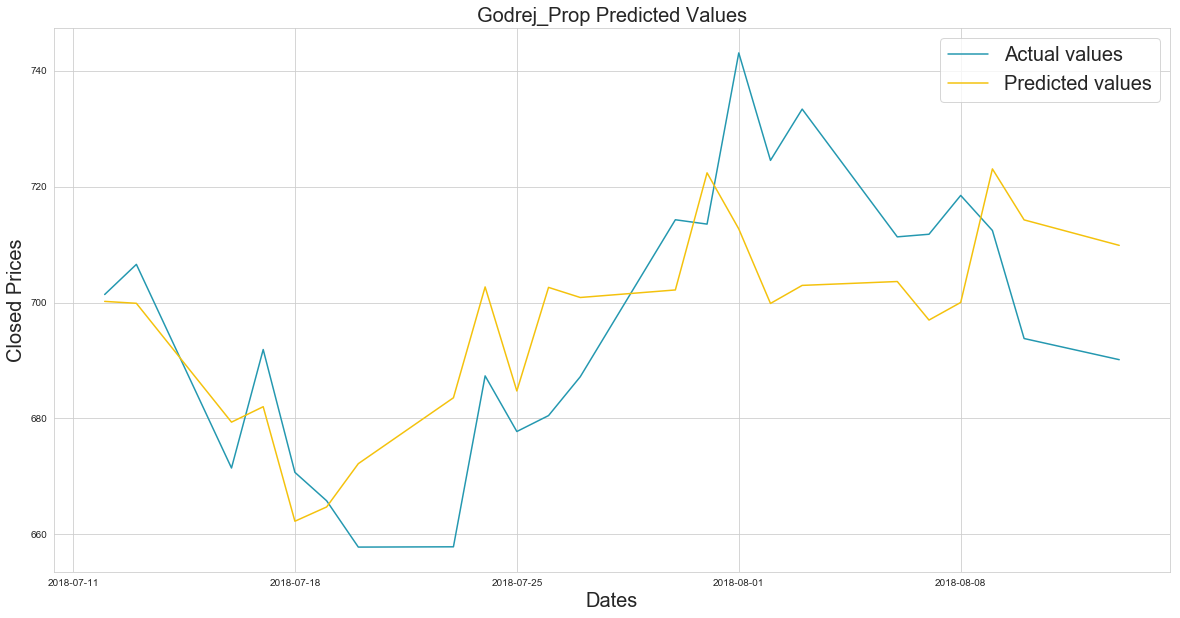

In [22]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Godrej_Prop Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})